In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
import seaborn as sns

In [2]:

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, n_features = 2, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)



Text(0.5, 1.0, 'Logistic Regression Dataset with 3 classes')

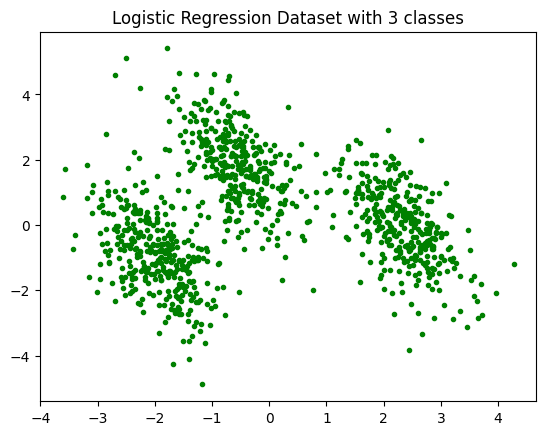

In [3]:
#plot the datasetplot(x, y, 'go--', linewidth=2, markersize=12)
plt.plot(X[:, 0], X[:, 1], 'go', linewidth=2, markersize=3)
plt.title("Logistic Regression Dataset with 3 classes")

In [4]:
estimators = []
titles = ["multinomial", "Logistic Regression"]
for multi_class in ("multinomial", "ovr"):
    clf = LogisticRegression(
        solver="sag", max_iter=100, random_state=42, multi_class=multi_class, verbose = 0
    ).fit(X, y)
#     plt.plot(clf.loss_curve_)
    estimators.append(clf)

# print the training scores
print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

training score : 0.976 (ovr)


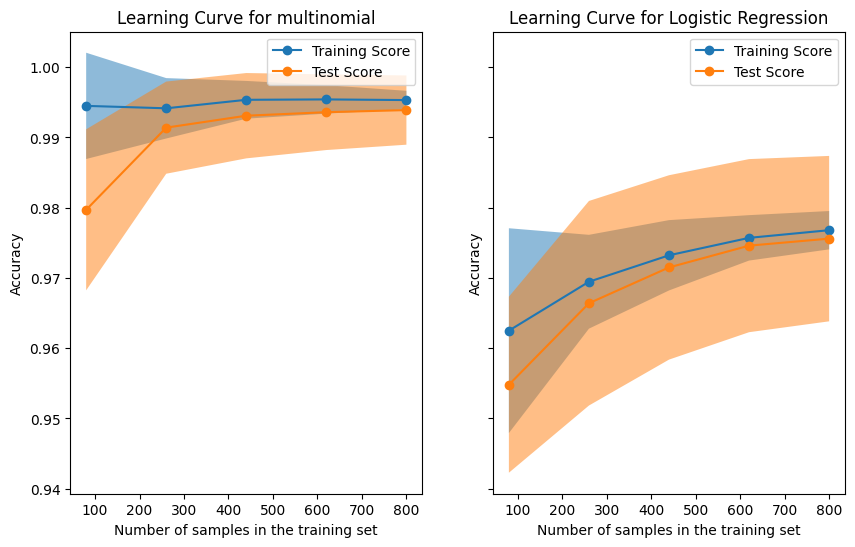

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate(estimators):
    LearningCurveDisplay.from_estimator(estimators[ax_idx], **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {titles[ax_idx]}")

/tmp/ipykernel_7885/3566612990.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


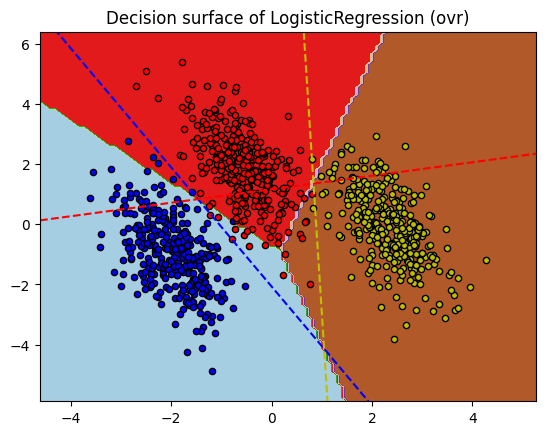

In [6]:

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
)
plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
plt.axis("tight")

# Plot also the training points
colors = "bry"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
    )

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
# plt.legend(['red', 'yellow', 'blue'])
plt.show()


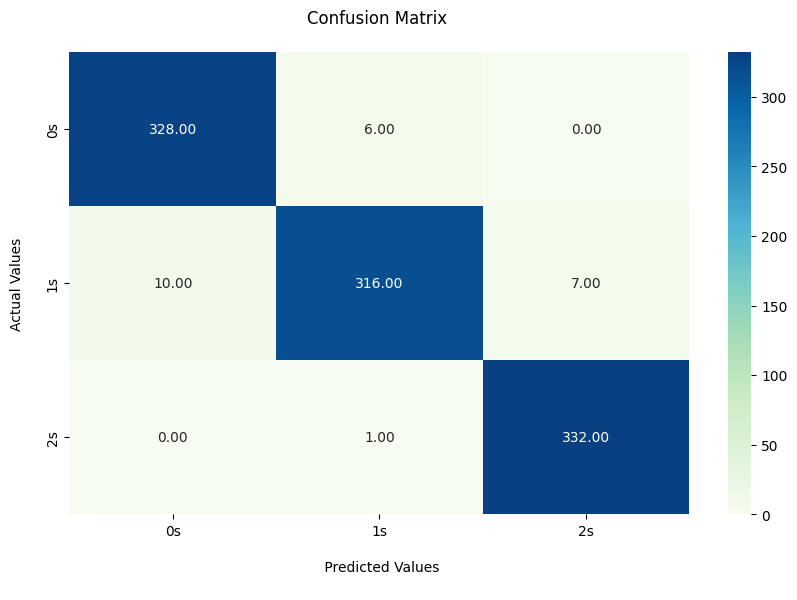

In [7]:
cm = confusion_matrix(y, estimators[1].predict(X))
# print(estimators[1].predict(X))
plt.figure(figsize=(10,6))
fx=sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['0s','1s','2s'])
fx.yaxis.set_ticklabels(['0s','1s','2s'])
plt.show()